# # WEBSCRAPING FROM  MERCADO LIBRE COLOMBIA WEB SITE, USED PRICES CAR MARKET 
This is a well structured source for used car listings and is generous to scrapers
Check https://www.mercadolibre.com.co/robots.txt for more information on what the website allow

# Package Imports:

In [ ]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Before we begin web-scraping, let's pause and look at how the data is structured in the website.
LINK='https://carros.mercadolibre.com.co/carros-usados_OrderId_PRICE_ITEM*CONDITION_2230581_NoIndex_True'
THIS PAGE  CONTAINS 42 PAGES RESULTS WHIT 48 items per page 

# Lets get started!!! 

In [4]:
r= requests.get('https://carros.mercadolibre.com.co/carros-usados_OrderId_PRICE_ITEM*CONDITION_2230581_NoIndex_True')#A filter is applied from the Mercado Libre website
#request with the Mercado Libre Colombia page using the query "used cars" with the filter "lowest price to highest listing"

In [5]:
r.status_code

200

In [6]:
soup=BeautifulSoup(r.content,'html.parser')

In [7]:
hojas = soup.find_all('li',attrs={"class":"andes-pagination__page-count"})
print(hojas)

[<li class="andes-pagination__page-count">de <!-- -->42</li>]


In [8]:
hojas1= [i.text for i in hojas]
print(hojas1)

['de 42']


In [9]:
pagina = soup.find_all('span',attrs={"class":"andes-pagination__link"})


In [10]:
pagina = [i.text for i in pagina]
pagina

['1']

# To implement an MVP, let's scrape the first 42 pages with 48 listings per page.

It looks like the website is hardcoded to give us only 42 pages and a maximum of 48 listings per page. To circumvent this, we'll have to use filters independent of each other to get the listings we can't access traditionally. That part is beyond the scope of the project at the moment, so let's limit our search to the first 43377 listings of sedans.

In [32]:
resultados = soup.find_all('span',attrs={"class":"ui-search-search-result__quantity-results shops-custom-secondary-font"})
resultados = [i.text for i in resultados]
resultados = int(resultados[0].replace("(",'').replace(")",'').replace('.','').replace(',','').replace(' resultados',''))
print(resultados)

43216


In [33]:
# Create empty lists to store the results
items = []
locations = []
prices = []
model =[]
kms =[]

urls_ind = ["https://carros.mercadolibre.com.co/carros-usados_Desde_" + str(i) + "_OrderId_PRICE_NoIndex_True" for i in range( 1 , 1521 , 48)]

for url in urls_ind:
    r1 = requests.get(url)
    soup1 = BeautifulSoup(r1.content, 'html.parser')

    # Here you can manipulate the HTML content of the soup1 page.
    item1 = soup1.find_all('h2', attrs={"class": "ui-search-item__title"})
    item_text = [i.text for i in item1]

    location = soup1.find_all("span", {"class": "ui-search-item__group__element ui-search-item__location shops__items-group-details"})
    location_text = [i.text for i in location]

    content_elements = soup1.find_all("div", {"class": "ui-search-result__content"})

    price_elements = [content_element.find("span", {"class": "price-tag-fraction"}) for content_element in content_elements]
    
    # Itera sobre cada elemento de precio encontrado/# Prices are obtained.
    for price_element in price_elements:
        # Si se encontró un elemento de precio, extrae el texto y añádelo a la lista de precios
        if price_element:
            prices.append(price_element.text)

    model_text=soup1.find_all('ul', attrs={"class": "ui-search-card-attributes ui-search-item__group__element shops__items-group-details"})
    model_elements = [model_element.find("li", {"class": "ui-search-card-attributes__attribute"}) for model_element in model_text]
    
    # Itera sobre cada elemento de precio encontrado
    for model_element in model_elements:
        # Si se encontró un elemento de precio, extrae el texto y añádelo a la lista de precios
        if model_element:
            model.append(model_element.text)

    kms_elements = soup1.find_all('ul', attrs={"class": "ui-search-card-attributes ui-search-item__group__element shops__items-group-details"})
    price_elements = [kms_element.find("li", {"class": "ui-search-card-attributes__attribute"}) for kms_element in kms_elements]
    
    # Itera sobre cada elemento de precio encontrado
    for kms_element in kms_elements:
        # Si se encontró un elemento de precio, extrae el texto y añádelo a la lista de precios
        if kms_element:
            kms.append(kms_element.text)

    # Agregar los resultados de cada iteración a las listas
    items.extend(item_text)
    locations.extend(location_text)

# Lengths of scraped lists

In [13]:
len(prices)

1529

In [14]:
len(model)

1529

In [15]:
len(items)

1529

In [16]:
urls_ind

['https://carros.mercadolibre.com.co/carros-usados_Desde_1_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_49_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_97_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_145_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_193_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_241_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_289_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_337_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_385_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_433_OrderId_PRICE_NoIndex_True',
 'https://carros.mercadolibre.com.co/carros-usados_Desde_481_OrderId_PRICE_NoIndex_True',
 'https://carr

In [17]:
model

['1998',
 '1995',
 '2005',
 '2012',
 '2010',
 '2014',
 '2012',
 '2010',
 '2014',
 '2011',
 '2013',
 '2016',
 '2017',
 '2012',
 '2005',
 '2016',
 '2011',
 '2012',
 '2008',
 '2009',
 '2015',
 '2019',
 '2011',
 '2013',
 '2014',
 '2008',
 '2015',
 '2014',
 '2018',
 '2019',
 '2012',
 '2012',
 '2015',
 '2016',
 '2010',
 '2011',
 '2015',
 '2016',
 '2012',
 '2012',
 '2011',
 '2005',
 '2015',
 '2017',
 '2013',
 '2016',
 '2008',
 '2018',
 '2016',
 '2009',
 '1997',
 '2005',
 '2013',
 '2012',
 '2016',
 '2018',
 '2018',
 '2016',
 '2016',
 '2016',
 '2016',
 '2022',
 '2013',
 '2020',
 '2020',
 '2020',
 '2010',
 '2006',
 '2020',
 '2010',
 '2012',
 '2013',
 '2014',
 '2015',
 '2014',
 '2016',
 '2016',
 '2019',
 '2012',
 '2016',
 '2019',
 '2021',
 '2012',
 '2020',
 '2015',
 '2019',
 '2019',
 '2003',
 '2013',
 '2020',
 '2017',
 '2018',
 '2018',
 '2014',
 '2016',
 '2016',
 '2018',
 '2019',
 '2015',
 '2016',
 '2014',
 '2020',
 '2013',
 '2019',
 '2017',
 '2014',
 '2022',
 '2020',
 '2016',
 '2014',
 '2018',
 

In [18]:
len(kms)

1529

In [19]:
len(locations)

1529

In [20]:
locations

['Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Suba - Bogotá D.C.',
 'Suba - Bogotá D.C.',
 'Antonio Nariño - Bogotá D.C.',
 'Antonio Nariño - Bogotá D.C.',
 'Antonio Nariño - Bogotá D.C.',
 'Suba - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Tunja - Boyaca',
 'Cali - Valle Del Cauca',
 'Fontibón - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Fontibón - Bogotá D.C.',
 'Pereira - Risaralda',
 'Suba - Bogotá D.C.',
 'Cali - Valle Del Cauca',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Cali - Valle Del Cauca',
 'Usaquén - Bogotá D.C.',
 'Armenia - Quindio',
 'Medellín - Antioquia',
 'Antonio Nariño - Bogotá D.C.',
 'Medellín - Antioquia',
 'Suba - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Cali - Valle Del Cauca',
 'Fontibón - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Usaquén - Bogotá D.C.',
 'Tunja - Boyaca',
 'Suba - Bogotá D.C.',
 'Barranquilla - 

# Everything looks rigth!!. Now it's time to put it all together in one table:

In [54]:
dfcarcol_new = pd.DataFrame({"items":items,"locations":locations,"prices":prices,"model":model,"kms":kms})

# convertir las columnas a string
dfcarcol_new_str= dfcarcol_new.to_csv('mlibretx.csv',index_col=False, encoding ='utf-8'  )

TypeError: to_csv() got an unexpected keyword argument 'index_col'

# Dataset and CSV archive create 

In [49]:
dfcarcol_new = dfcarcol_new.applymap(str)

# imprimir el DataFrame
print(dfcarcol_new)

                                                  items  \
0                                Mitsubishi Lancer Glxi   
1                             Mazda 626 2.0 Matsuri Nim   
2                         Renault Symbol 1.4 Expression   
3                     Chery Nice 1.3 Ya1ac-1115 Comfort   
4                        Renault Twingo Access Mt 800cc   
...                                                 ...   
1531          Volvo Xc60 2.0 T8 Awd Inscription Hibrido   
1532                                         Bmw X6 40i   
1533                              Toyota Prado Txl 2.8l   
1534                        Mercedes-benz Clase Gle 450   
1535  Land Rover Discovery Land Rover New Discovery ...   

                  locations       prices model             kms  
0     Usaquén - Bogotá D.C.   19.800.000  1998  1998163.000 Km  
1     Usaquén - Bogotá D.C.   19.800.000  1995  1995127.000 Km  
2     Usaquén - Bogotá D.C.   19.800.000  2005  2005182.000 Km  
3        Suba - Bogotá D.C.   2

In [50]:
print(dfcarcol_new.dtypes)

items        object
locations    object
prices       object
model        object
kms          object
dtype: object


In [51]:
dfcarcol_new =pd.DataFrame(data)

NameError: name 'data' is not defined

In [45]:
print(dfcarcol_new.dtypes)

items        object
locations    object
prices       object
model        object
kms          object
dtype: object


In [40]:
dfcarcol_new=pd.DataFrame.to_string(self,buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, max_rows=None, min_rows=None, max_cols=None, show_dimensions=False, decimal='.', line_width=None)




NameError: name 'self' is not defined

In [30]:
dfcarcol_new['prices'] = pd.to_string(['prices'].replace('.', ' ')


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_23788/3923929015.py, line 1)

In [29]:
dfcarcol_new.head()

,items,locations,prices,model,kms
0,Mitsubishi Lancer Glxi,Usaquén - Bogotá D.C.,19.800.000,1998,1998163.000 Km
1,Mazda 626 2.0 Matsuri Nim,Usaquén - Bogotá D.C.,19.800.000,1995,1995127.000 Km
2,Renault Symbol 1.4 Expression,Usaquén - Bogotá D.C.,19.800.000,2005,2005182.000 Km
3,Chery Nice 1.3 Ya1ac-1115 Comfort,Suba - Bogotá D.C.,21.990.000,2012,201252.000 Km
4,Renault Twingo Access Mt 800cc,Suba - Bogotá D.C.,22.490.000,2010,2010120.000 Km


In [31]:
dfcarcol_new['prices'] = dfcarcol_new['prices'].astype(int)

ValueError: invalid literal for int() with base 10: '19.800.000'

In [23]:
dfcarcol_new.head()

,items,locations,prices,model,kms
0,Mitsubishi Lancer Glxi,Usaquén - Bogotá D.C.,19.800.000,1998,1998163.000 Km
1,Mazda 626 2.0 Matsuri Nim,Usaquén - Bogotá D.C.,19.800.000,1995,1995127.000 Km
2,Renault Symbol 1.4 Expression,Usaquén - Bogotá D.C.,19.800.000,2005,2005182.000 Km
3,Chery Nice 1.3 Ya1ac-1115 Comfort,Suba - Bogotá D.C.,21.990.000,2012,201252.000 Km
4,Renault Twingo Access Mt 800cc,Suba - Bogotá D.C.,22.490.000,2010,2010120.000 Km


In [23]:
print(dfcarcol_new.dtypes)

items        object
locations    object
prices       object
model        object
kms          object
dtype: object


In [25]:



dfcarcol_new = dfcarcol_new.rename(columns={"kms": "año"}) # Renombra la columna "kms" a "año"



In [27]:
dfcarcol_new = dfcarcol_new.drop(columns=["model"])

In [29]:



dfcarcol_new = dfcarcol_new.rename(columns={"items": "modelo"}) # Renombra la columna "kms" a "año"



In [31]:



dfcarcol_new = dfcarcol_new.rename(columns={"locations": "ubicación"}) # Renombra la columna "kms" a "año"



In [35]:

dfcarcol_new = dfcarcol_new.rename(columns={"prices": "precio"}) # 

In [37]:

dfcarcol_new = dfcarcol_new.reindex(columns=["precio", "año", "ubicación", "modelo"]) #

In [41]:
dfcarcol_new.head()

,precio,año,ubicación,modelo
0,19.800.000,1998163.000 Km,Usaquén - Bogotá D.C.,Mitsubishi Lancer Glxi
1,19.800.000,1995127.000 Km,Usaquén - Bogotá D.C.,Mazda 626 2.0 Matsuri Nim
2,19.800.000,2005182.000 Km,Usaquén - Bogotá D.C.,Renault Symbol 1.4 Expression
3,21.990.000,201252.000 Km,Suba - Bogotá D.C.,Chery Nice 1.3 Ya1ac-1115 Comfort
4,22.490.000,2010120.000 Km,Suba - Bogotá D.C.,Renault Twingo Access Mt 800cc


In [42]:
dfcarcol_new.tail(50)

,precio,año,ubicación,modelo
1468,212.990.000,201948.000 Km,Medellín - Antioquia,Volvo Xc60 T8 R-desing Hibrido
1469,215.000.000,20218.453 Km,Suba - Bogotá D.C.,Audi Q5 Suv 4x4
1470,215.900.000,201946.400 Km,Suba - Bogotá D.C.,Volvo Xc90 2.0 T6 Awd Inscription
1471,215.900.000,202130.887 Km,Suba - Bogotá D.C.,Audi Q5 Sport Back Hibrida
1472,215.900.000,201930.636 Km,Suba - Bogotá D.C.,Mercedes-benz Clase Gle 250 4matic
1473,215.990.000,202046.000 Km,Medellín - Antioquia,Mercedes-benz Clase Glc 2.0 4matic Coupe
1474,216.990.000,202119.300 Km,Medellín - Antioquia,Toyota Fortuner 2.7l
1475,216.990.000,201815.502 Km,Medellín - Antioquia,Mercedes-benz Clase Gle 4.7 4matic
1476,218.990.000,202330 Km,Medellín - Antioquia,Ford Ranger 3.2 Limited
1477,218.990.000,202380 Km,Medellín - Antioquia,Ford Ranger 3.2 Limited


In [ ]:

dfcarcol_new = dfcarcol_new.reindex(columns=["modelo", "ubicación", "prices", "año"]) #

In [43]:
dfcarcol_new.tail()

,precio,año,ubicación,modelo
1513,464.000.000,202216 Km,Usaquén - Bogotá D.C.,Toyota Prado 4.0 Vx Fl
1514,2.300.000,2013150.000 Km,La Calera - Cundinamarca,Nissan Frontier Platon Platon Usado
1515,21.000.000,2006700 Km,Rionegro - Antioquia,Chana Star Usado
1516,26.000.000,1998129.000 Km,Bucaramanga - Santander,Chevrolet 1988 Usada
1517,43.000.000,2007190.000 Km,Medellín - Antioquia,Mazda 2007 Usada


In [144]:
dfcarcol_new.sample(10)

,items,locations,prices,model,kms
1064,Jeep Cherokee Longitude At 4x4,Suba - Bogotá D.C.,106.900.000,2019,201957.698 Km
1482,Toyota 4runner 4.0 Limited Fl,Medellín - Antioquia,219.800.000,2017,201716.636 Km
1175,Mazda Cx-30 Grandtouring,Suba - Bogotá D.C.,122.900.000,2021,202154.500 Km
840,Volkswagen Jetta Comfortline,Suba - Bogotá D.C.,87.900.000,2020,202028.800 Km
320,Renault Kwid Zen,Suba - Bogotá D.C.,54.900.000,2023,20231.000 Km
547,Renault Duster 1.6 Expression Mecánica,Suba - Bogotá D.C.,69.500.000,2019,201959.082 Km
1316,Mercedes-benz Clase C Mercedes Benz C200 Avant...,Usaquén - Bogotá D.C.,146.000.000,2020,202014.966 Km
170,Nissan Tiida Tiida Mio S/a,Suba - Bogotá D.C.,46.500.000,2013,201390.000 Km
1112,Citroën C5 Aircross Shine,Suba - Bogotá D.C.,113.900.000,2020,202024.217 Km
834,Renault Duster Oroch 2.0 Dynamique,Bucaramanga - Santander,87.000.000,2021,202152.200 Km


In [145]:
dfcarcol_new.info

<bound method DataFrame.info of                                     items                     locations  \
0                  Mitsubishi Lancer Glxi         Usaquén - Bogotá D.C.   
1               Mazda 626 2.0 Matsuri Nim         Usaquén - Bogotá D.C.   
2           Renault Symbol 1.4 Expression         Usaquén - Bogotá D.C.   
3       Chery Nice 1.3 Ya1ac-1115 Comfort            Suba - Bogotá D.C.   
4                      Geely Lc 1.3 Panda  Antonio Nariño - Bogotá D.C.   
...                                   ...                           ...   
1517               Toyota Prado 4.0 Vx Fl         Usaquén - Bogotá D.C.   
1518  Nissan Frontier Platon Platon Usado      La Calera - Cundinamarca   
1519                     Chana Star Usado          Rionegro - Antioquia   
1520                 Chevrolet 1988 Usada       Bucaramanga - Santander   
1521                     Mazda 2007 Usada          Medellín - Antioquia   

           prices model             kms  
0      19.800.000  1998  

In [146]:
dfcarcol_new.shape


(1522, 5)

In [147]:
dfcarcol_new.isnull().sum()

items        0
locations    0
prices       0
model        0
kms          0
dtype: int64

In [148]:
dfcarcol_new.value_counts("items")

items
Renault Duster Intens                14
Nissan Kicks Exclusive               12
Renault Kwid 1.0 12v                 12
Nissan Kicks Advance                 10
Renault Captur 2.0 Zen Mecánica      10
                                     ..
Mazda 2 215hm1 Sd Mt                  1
Mazda 2 Grand Touring                 1
Mazda 2 Grand Touring Sedan           1
Mazda 2 Hb At Gsl                     1
Volvo Xc90 2.0 T6 Awd Inscription     1
Length: 1009, dtype: int64

In [173]:
dfcarcol_new[['brand', 'model_type']] = dfcarcol_new['items'].str.split(' ', 1, expand=True)

In [176]:
dfcarcol_new = dfcarcol_new.reindex(columns=['brand', 'model_type','items', 'locations', 'prices', 'model', 'kms'])


In [178]:
dfcarcol_new = dfcarcol_new.drop(columns=['items'])

In [179]:
dfcarcol_new.head()

,brand,model_type,locations,prices,model,kms
0,Mitsubishi,Lancer Glxi,Usaquén - Bogotá D.C.,19.800.000,1998,1998163.000 Km
1,Mazda,626 2.0 Matsuri Nim,Usaquén - Bogotá D.C.,19.800.000,1995,1995127.000 Km
2,Renault,Symbol 1.4 Expression,Usaquén - Bogotá D.C.,19.800.000,2005,2005182.000 Km
3,Chery,Nice 1.3 Ya1ac-1115 Comfort,Suba - Bogotá D.C.,21.990.000,2012,201252.000 Km
4,Geely,Lc 1.3 Panda,Antonio Nariño - Bogotá D.C.,22.990.000,2014,201447.638 Km


In [190]:
dfcarcol_new['año']=dfcarcol_new.model.str.cat(dfcarcol_new.kms, sep='')

In [192]:
dfcarcol_new = dfcarcol_new.drop(columns=['año'])

In [194]:
dfcarcol_new = dfcarcol_new.drop(columns=['model'])

In [196]:
dfcarcol_new['modelo']=dfcarcol_new.brand.str.cat(dfcarcol_new.model_type, sep='')

In [198]:
dfcarcol_new = dfcarcol_new.drop(columns=['brand','model_type'])

In [44]:
dfcarcol_new.tail()

,precio,año,ubicación,modelo
1513,464.000.000,202216 Km,Usaquén - Bogotá D.C.,Toyota Prado 4.0 Vx Fl
1514,2.300.000,2013150.000 Km,La Calera - Cundinamarca,Nissan Frontier Platon Platon Usado
1515,21.000.000,2006700 Km,Rionegro - Antioquia,Chana Star Usado
1516,26.000.000,1998129.000 Km,Bucaramanga - Santander,Chevrolet 1988 Usada
1517,43.000.000,2007190.000 Km,Medellín - Antioquia,Mazda 2007 Usada


In [65]:
dfcarcol_new['source'] = dfcarcol_new['source'].astype(str)

In [49]:
dfcarcol_new.tail()

,precio,año,ubicación,modelo,source
1513,464.000.000,202216 Km,Usaquén - Bogotá D.C.,Toyota Prado 4.0 Vx Fl,
1514,2.300.000,2013150.000 Km,La Calera - Cundinamarca,Nissan Frontier Platon Platon Usado,
1515,21.000.000,2006700 Km,Rionegro - Antioquia,Chana Star Usado,
1516,26.000.000,1998129.000 Km,Bucaramanga - Santander,Chevrolet 1988 Usada,
1517,43.000.000,2007190.000 Km,Medellín - Antioquia,Mazda 2007 Usada,


In [66]:
dfcarcol_new['source'] = dfcarcol_new['source'].replace('','mercado libre')

In [67]:
dfcarcol_new.head()

,precio,año,ubicación,modelo,source
0,19.800.000,1998163.000 Km,Usaquén - Bogotá D.C.,Mitsubishi Lancer Glxi,
1,19.800.000,1995127.000 Km,Usaquén - Bogotá D.C.,Mazda 626 2.0 Matsuri Nim,
2,19.800.000,2005182.000 Km,Usaquén - Bogotá D.C.,Renault Symbol 1.4 Expression,
3,21.990.000,201252.000 Km,Suba - Bogotá D.C.,Chery Nice 1.3 Ya1ac-1115 Comfort,
4,22.490.000,2010120.000 Km,Suba - Bogotá D.C.,Renault Twingo Access Mt 800cc,


Empty DataFrame
Columns: [precio, año, ubicación, modelo, source]
Index: []


In [75]:
dfcarcol_new['source'].fillna("mercado_libre", inplace = True)


In [85]:
dfcarcol_new['source_filled'] = dfcarcol_new['source'].fillna('mercado libre')
dfcarcol_new['source'] = dfcarcol_new['source_filled']
dfcarcol_new.drop(columns=['source_filled'], inplace=True)


In [86]:

print(dfcarcol_new['source'].isna().sum())

0


In [88]:
dfcarcol_new.head()

,precio,año,ubicación,modelo,source
0,19.800.000,1998163.000 Km,Usaquén - Bogotá D.C.,Mitsubishi Lancer Glxi,
1,19.800.000,1995127.000 Km,Usaquén - Bogotá D.C.,Mazda 626 2.0 Matsuri Nim,
2,19.800.000,2005182.000 Km,Usaquén - Bogotá D.C.,Renault Symbol 1.4 Expression,
3,21.990.000,201252.000 Km,Suba - Bogotá D.C.,Chery Nice 1.3 Ya1ac-1115 Comfort,
4,22.490.000,2010120.000 Km,Suba - Bogotá D.C.,Renault Twingo Access Mt 800cc,


In [89]:
dfcarcol_new.to_csv('mlibre_final.csv', index=False, encoding='utf-8')

In [90]:
dfcarcol_new.head(20)

,precio,año,ubicación,modelo,source
0,19.800.000,1998163.000 Km,Usaquén - Bogotá D.C.,Mitsubishi Lancer Glxi,
1,19.800.000,1995127.000 Km,Usaquén - Bogotá D.C.,Mazda 626 2.0 Matsuri Nim,
2,19.800.000,2005182.000 Km,Usaquén - Bogotá D.C.,Renault Symbol 1.4 Expression,
3,21.990.000,201252.000 Km,Suba - Bogotá D.C.,Chery Nice 1.3 Ya1ac-1115 Comfort,
4,22.490.000,2010120.000 Km,Suba - Bogotá D.C.,Renault Twingo Access Mt 800cc,
5,22.990.000,201447.638 Km,Antonio Nariño - Bogotá D.C.,Geely Lc 1.3 Panda,
6,22.990.000,201252.000 Km,Antonio Nariño - Bogotá D.C.,Chery Nice 1.3 Ya1ac-1115 Comfort,
7,22.990.000,2010120.000 Km,Antonio Nariño - Bogotá D.C.,Renault Twingo 1.2 Access +,
8,27.500.000,201482.600 Km,Suba - Bogotá D.C.,Chevrolet Spark Spark,
9,27.800.000,2011120.000 Km,Usaquén - Bogotá D.C.,Peugeot 207 1.6 Compact Xs,


In [113]:
df.isnull().sum()


items        0
locations    0
prices       0
model        0
kms          0
marca        0
modelo       0
dtype: int64

In [114]:
df.value_counts("locations")

locations
Medellín - Antioquia                                                 305
Suba - Bogotá D.C.                                                   287
Usaquén - Bogotá D.C.                                                234
Engativa - Bogotá D.C.                                               175
Cali - Valle Del Cauca                                               168
                                                                    ... 
San Francisco - Cundinamarca                                           1
Florida - Valle Del Cauca                                              1
Santa Marta (Distrito Turistico Cultural E Historico) - Magdalena      1
Moniquirá - Boyaca                                                     1
Madrid - Cundinamarca                                                  1
Length: 93, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

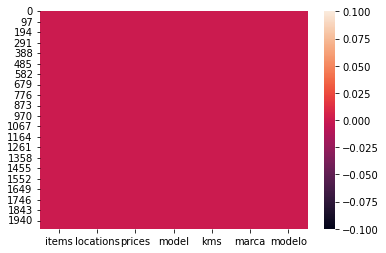

In [115]:
sns.heatmap(df.isnull())

plt.show

In [93]:
print(dfcarcol.dtypes)

items        object
locations    object
prices       object
model        object
kms          object
marca        object
modelo       object
dtype: object


In [187]:
print(df.dtypes)


items        object
locations    object
prices       object
model        object
kms          object
marca        object
modelo       object
dtype: object


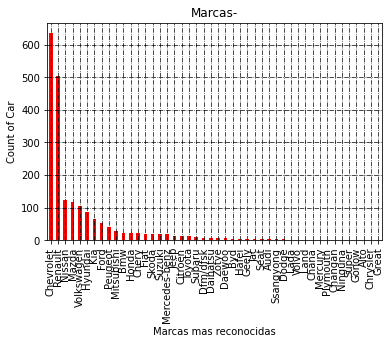

In [118]:
plt.xlabel("Marcas mas reconocidas")
plt.ylabel("Count of Car")
dfcarcol["marca"].value_counts().plot(kind="bar",title="Marcas-",color="red")
plt.grid(color="black",linestyle="-.", linewidth=0.7)

In [120]:
BrandVsPrice=pd.DataFrame(df.groupby("Marca")["prices"].mean())
BrandVsPrice.plot.bar(color="tomato",figsize=(11,5))
plt.grid(linestyle="-.")
plt.show()

KeyError: 'Marca'